In [1]:
import pandas as pd
import torch
# import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from evaluation_metrics import optimism_ratio, pessimism_ratio
from models import Martingale, RNN, GRU, LSTM, stack
from data import pull_data, make_train_test, testing

In [2]:
# compile results for passed models into dataframe
def tabulate(X, y, models, metrics):
    """
    X - features
    y - true output
    models - dict of torch models
    metrics - dict of metrics with form func(y_true, y_pred)
    """
    if type(y) == torch.Tensor:
        y = y.numpy()
    tab = pd.DataFrame(index=metrics.keys())
    for m in models.keys():
        models[m].eval()
        pred = models[m](X)
        pred = pred.detach().numpy()
        mets = list()
        for met in tab.index:
            if met == "RMSE":
                mets.append(metrics[met](y, pred, squared=False))
            else:
                mets.append(metrics[met](y, pred))
        tab[m] = mets
        
    return tab

In [3]:
# create train and test datasets
data = pull_data("AAPL")
train_x, train_y, test_x, test_y = make_train_test(data)

[*********************100%***********************]  1 of 1 completed


In [4]:
# define input and output sizes for all models
input_size = 1
output_size = 1

### Martingale

In [5]:
martingale = Martingale()

### RNNs

In [12]:
# train RNN with 1 hidden layer
epochs = 100
lr = 0.01
rnn1 = RNN(input_size, hidden_size=50, num_layers=1, output_size=output_size, nonlinearity="relu")
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(rnn1.parameters(), lr=lr)

hist_rnn1 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_rnn1 = rnn1(train_x)
    loss = criterion(output_rnn1, train_y)
    loss.backward()
    optimizer.step()
    hist_rnn1.append(loss.item())
    
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0556
Epoch: 20/100.......... Loss: 0.0276
Epoch: 30/100.......... Loss: 0.0151
Epoch: 40/100.......... Loss: 0.0125
Epoch: 50/100.......... Loss: 0.0106
Epoch: 60/100.......... Loss: 0.0085
Epoch: 70/100.......... Loss: 0.0059
Epoch: 80/100.......... Loss: 0.0024
Epoch: 90/100.......... Loss: 0.0001
Epoch: 100/100.......... Loss: 0.0002


In [16]:
# train RNN with 2 hidden layers
epochs = 100
lr = 0.01
rnn2 = RNN(input_size, hidden_size=50, num_layers=2, output_size=output_size, nonlinearity="relu")
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(rnn2.parameters(), lr=lr)

hist_rnn2 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_rnn2 = rnn2(train_x)
    loss = criterion(output_rnn2, train_y)
    loss.backward()
    optimizer.step()
    hist_rnn2.append(loss.item())
    
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0351
Epoch: 20/100.......... Loss: 0.0204
Epoch: 30/100.......... Loss: 0.0116
Epoch: 40/100.......... Loss: 0.0011
Epoch: 50/100.......... Loss: 0.0010
Epoch: 60/100.......... Loss: 0.0001
Epoch: 70/100.......... Loss: 0.0001
Epoch: 80/100.......... Loss: 0.0001
Epoch: 90/100.......... Loss: 0.0001
Epoch: 100/100.......... Loss: 0.0001


In [25]:
# train RNN with 3 hidden layers
epochs = 100
lr = 0.01
rnn3 = RNN(input_size, hidden_size=50, num_layers=3, output_size=output_size, nonlinearity="relu")
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(rnn3.parameters(), lr=lr)

hist_rnn3 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_rnn3 = rnn3(train_x)
    loss = criterion(output_rnn3, train_y)
    loss.backward()
    optimizer.step()
    hist_rnn3.append(loss.item())
    
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0347
Epoch: 20/100.......... Loss: 0.0237
Epoch: 30/100.......... Loss: 0.0037
Epoch: 40/100.......... Loss: 0.0041
Epoch: 50/100.......... Loss: 0.0019
Epoch: 60/100.......... Loss: 0.0006
Epoch: 70/100.......... Loss: 0.0014
Epoch: 80/100.......... Loss: 0.0017
Epoch: 90/100.......... Loss: 0.0001
Epoch: 100/100.......... Loss: 0.0001


### GRUs

In [26]:
# train GRU with 1 hidden layer
epochs = 100
lr = 0.01
gru1 = GRU(input_size, hidden_size=50, num_layers=1, output_size=output_size)
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(gru1.parameters(), lr=lr)

hist_gru1 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_gru1 = gru1(train_x)
    loss = criterion(output_gru1, train_y)
    loss.backward()
    optimizer.step()
    hist_gru1.append(loss.item())
    
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0435
Epoch: 20/100.......... Loss: 0.0127
Epoch: 30/100.......... Loss: 0.0124
Epoch: 40/100.......... Loss: 0.0066
Epoch: 50/100.......... Loss: 0.0045
Epoch: 60/100.......... Loss: 0.0017
Epoch: 70/100.......... Loss: 0.0001
Epoch: 80/100.......... Loss: 0.0002
Epoch: 90/100.......... Loss: 0.0000
Epoch: 100/100.......... Loss: 0.0001


In [27]:
# train GRU with 2 layers
epochs = 100
lr = 0.01
gru2 = GRU(input_size, hidden_size=50, num_layers=2, output_size=output_size)
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(gru2.parameters(), lr=lr)

hist_gru2 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_gru2 = gru2(train_x)
    loss = criterion(output_gru2, train_y)
    loss.backward()
    optimizer.step()
    hist_gru2.append(loss.item())
    
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0279
Epoch: 20/100.......... Loss: 0.0279
Epoch: 30/100.......... Loss: 0.0140
Epoch: 40/100.......... Loss: 0.0045
Epoch: 50/100.......... Loss: 0.0007
Epoch: 60/100.......... Loss: 0.0001
Epoch: 70/100.......... Loss: 0.0003
Epoch: 80/100.......... Loss: 0.0001
Epoch: 90/100.......... Loss: 0.0001
Epoch: 100/100.......... Loss: 0.0001


In [28]:
# train GRU with 3 layers
epochs = 100
lr = 0.01
gru3 = GRU(input_size, hidden_size=50, num_layers=3, output_size=output_size)
criterion = torch.nn.MSELoss(reduction="mean")
optimizer = torch.optim.Adam(gru3.parameters(), lr=lr)

hist_gru3 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_gru3 = gru3(train_x)
    loss = criterion(output_gru3, train_y)
    loss.backward()
    optimizer.step()
    hist_gru3.append(loss.item())
    
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0277
Epoch: 20/100.......... Loss: 0.0273
Epoch: 30/100.......... Loss: 0.0262
Epoch: 40/100.......... Loss: 0.0102
Epoch: 50/100.......... Loss: 0.0038
Epoch: 60/100.......... Loss: 0.0017
Epoch: 70/100.......... Loss: 0.0007
Epoch: 80/100.......... Loss: 0.0003
Epoch: 90/100.......... Loss: 0.0002
Epoch: 100/100.......... Loss: 0.0001


### LSTMs

In [29]:
# train LSTM with 1 hidden layer
epochs = 100
lr = 0.01
lstm1 = LSTM(input_size, hidden_size=50, output_size=output_size, num_layers=1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm1.parameters(), lr=lr)

hist_lstm1 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_lstm1 = lstm1(train_x)
    loss = criterion(output_lstm1, train_y)
    loss.backward()
    optimizer.step()
    hist_lstm1.append(loss.item())
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0306
Epoch: 20/100.......... Loss: 0.0208
Epoch: 30/100.......... Loss: 0.0138
Epoch: 40/100.......... Loss: 0.0103
Epoch: 50/100.......... Loss: 0.0042
Epoch: 60/100.......... Loss: 0.0006
Epoch: 70/100.......... Loss: 0.0003
Epoch: 80/100.......... Loss: 0.0003
Epoch: 90/100.......... Loss: 0.0001
Epoch: 100/100.......... Loss: 0.0001


In [35]:
# train LSTM with 2 hidden layers
epochs = 100
lr = 0.01
lstm2 = LSTM(input_size, hidden_size=50, output_size=output_size, num_layers=2)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm2.parameters(), lr=lr)

hist_lstm2 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_lstm2 = lstm2(train_x)
    loss = criterion(output_lstm2, train_y)
    loss.backward()
    optimizer.step()
    hist_lstm2.append(loss.item())
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0291
Epoch: 20/100.......... Loss: 0.0257
Epoch: 30/100.......... Loss: 0.0088
Epoch: 40/100.......... Loss: 0.0018
Epoch: 50/100.......... Loss: 0.0008
Epoch: 60/100.......... Loss: 0.0005
Epoch: 70/100.......... Loss: 0.0003
Epoch: 80/100.......... Loss: 0.0001
Epoch: 90/100.......... Loss: 0.0001
Epoch: 100/100.......... Loss: 0.0001


In [36]:
# train LSTM with 3 hidden layers
epochs = 100
lr = 0.01
lstm3 = LSTM(input_size, hidden_size=50, output_size=output_size, num_layers=3)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm3.parameters(), lr=lr)

hist_lstm3 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_lstm3 = lstm3(train_x)
    loss = criterion(output_lstm3, train_y)
    loss.backward()
    optimizer.step()
    hist_lstm3.append(loss.item())
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0365
Epoch: 20/100.......... Loss: 0.0372
Epoch: 30/100.......... Loss: 0.0327
Epoch: 40/100.......... Loss: 0.0168
Epoch: 50/100.......... Loss: 0.0054
Epoch: 60/100.......... Loss: 0.0014
Epoch: 70/100.......... Loss: 0.0006
Epoch: 80/100.......... Loss: 0.0002
Epoch: 90/100.......... Loss: 0.0001
Epoch: 100/100.......... Loss: 0.0001


### ls-GRUs

In [41]:
# train ls-GRU with 1 hidden layer
epochs = 100
lr = 0.01
stacked1 = stack(input_size, hidden_size=50, output_size=output_size, num_layers=1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(stacked1.parameters(), lr=lr)

hist_stacked1 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_stacked1 = stacked1(train_x)
    loss = criterion(output_stacked1, train_y)
    loss.backward()
    optimizer.step()
    hist_stacked1.append(loss.item())
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0390
Epoch: 20/100.......... Loss: 0.0139
Epoch: 30/100.......... Loss: 0.0101
Epoch: 40/100.......... Loss: 0.0071
Epoch: 50/100.......... Loss: 0.0030
Epoch: 60/100.......... Loss: 0.0003
Epoch: 70/100.......... Loss: 0.0002
Epoch: 80/100.......... Loss: 0.0001
Epoch: 90/100.......... Loss: 0.0000
Epoch: 100/100.......... Loss: 0.0000


In [42]:
# train ls-GRU with 2 hidden layer
epochs = 100
lr = 0.01
stacked2 = stack(input_size, hidden_size=50, output_size=output_size, num_layers=2)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(stacked2.parameters(), lr=lr)

hist_stacked2 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_stacked2 = stacked2(train_x)
    loss = criterion(output_stacked2, train_y)
    loss.backward()
    optimizer.step()
    hist_stacked2.append(loss.item())
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0276
Epoch: 20/100.......... Loss: 0.0137
Epoch: 30/100.......... Loss: 0.0044
Epoch: 40/100.......... Loss: 0.0017
Epoch: 50/100.......... Loss: 0.0005
Epoch: 60/100.......... Loss: 0.0000
Epoch: 70/100.......... Loss: 0.0001
Epoch: 80/100.......... Loss: 0.0001
Epoch: 90/100.......... Loss: 0.0001
Epoch: 100/100.......... Loss: 0.0000


In [43]:
# train ls-GRU with 3 hidden layer
epochs = 100
lr = 0.01
stacked3 = stack(input_size, hidden_size=50, output_size=output_size, num_layers=3)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(stacked3.parameters(), lr=lr)

hist_stacked3 = list()
for e in range(epochs):
    optimizer.zero_grad()
    output_stacked3 = stacked3(train_x)
    loss = criterion(output_stacked3, train_y)
    loss.backward()
    optimizer.step()
    hist_stacked3.append(loss.item())
    if (e + 1) % 10 == 0:
        print("Epoch: {}/{}..........".format(e+1, epochs), end=" ")
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/100.......... Loss: 0.0208
Epoch: 20/100.......... Loss: 0.0022
Epoch: 30/100.......... Loss: 0.0014
Epoch: 40/100.......... Loss: 0.0010
Epoch: 50/100.......... Loss: 0.0002
Epoch: 60/100.......... Loss: 0.0001
Epoch: 70/100.......... Loss: 0.0001
Epoch: 80/100.......... Loss: 0.0000
Epoch: 90/100.......... Loss: 0.0000
Epoch: 100/100.......... Loss: 0.0000


In [44]:
metrics = {"RMSE": mean_squared_error, "R-Squared": r2_score, "OR": optimism_ratio, "PR": pessimism_ratio}
models = {"Martingale": martingale,
        "1-Layer RNN": rnn1, "1-Layer GRU": gru1, "1-Layer LSTM": lstm1, "1-Layer ls-GRU": stacked1,
        "2-Layer RNN": rnn2, "2-Layer GRU": gru2, "2-Layer LSTM": lstm2, "2-Layer ls-GRU": stacked2,
        "3-Layer RNN": rnn3, "3-Layer GRU": gru3, "3-Layer LSTM": lstm3, "3-Layer ls-GRU": stacked3}
tab = tabulate(test_x, test_y, models, metrics)
tab.columns = tab.columns.str.split(" ", expand=True)
print("Results:")
tab

Results:


Martingale   1-Layer                                 2-Layer  \
                 NaN       RNN       GRU      LSTM    ls-GRU       RNN   
RMSE        0.015912  0.255759  0.044402  0.255294  0.034726  0.410256   
R-Squared   0.997501  0.354450  0.980543  0.356797  0.988099 -0.661027   
OR          0.525896  0.102922  0.233732  0.035193  0.923639  0.051129   
PR          0.600266  0.934263  0.872510  0.995352  0.126826  0.995352   

                                          3-Layer                      \
                GRU      LSTM    ls-GRU       RNN       GRU      LSTM   
RMSE       0.030074  0.235926  0.032112  0.474960  0.088512  0.263590   
R-Squared  0.991074  0.450689  0.989823 -1.226288  0.922684  0.314317   
OR         0.710491  0.094954  0.870518  0.029880  0.425631  0.066401   
PR         0.363214  0.962151  0.204515  0.996016  0.661355  0.971448   

                     
             ls-GRU  
RMSE       0.073291  
R-Squared  0.946989  
OR         0.438247  
PR         0.726428

In [45]:
rnn_outs = {"RNN-1": (output_rnn1, hist_rnn1), "RNN-2": (output_rnn2, hist_rnn2), "RNN-3": (output_rnn3, hist_rnn3)}
gru_outs = {"GRU-1": (output_gru1, hist_gru1), "GRU-2": (output_gru2, hist_gru2), "GRU-3": (output_gru3, hist_gru3)}
lstm_outs = {"LSTM-1": (output_lstm1, hist_lstm1), "LSTM-2": (output_lstm2, hist_lstm2), "LSTM-3": (output_lstm3, hist_lstm3)}
lsgr_outs = {"ls-GRU-1": (output_stacked1, hist_stacked1), "ls-GRU-2": (output_stacked2, hist_stacked2), "ls-GRU-3": (output_stacked3, hist_stacked3)}
outs = [rnn_outs, gru_outs, lstm_outs, lsgr_outs]

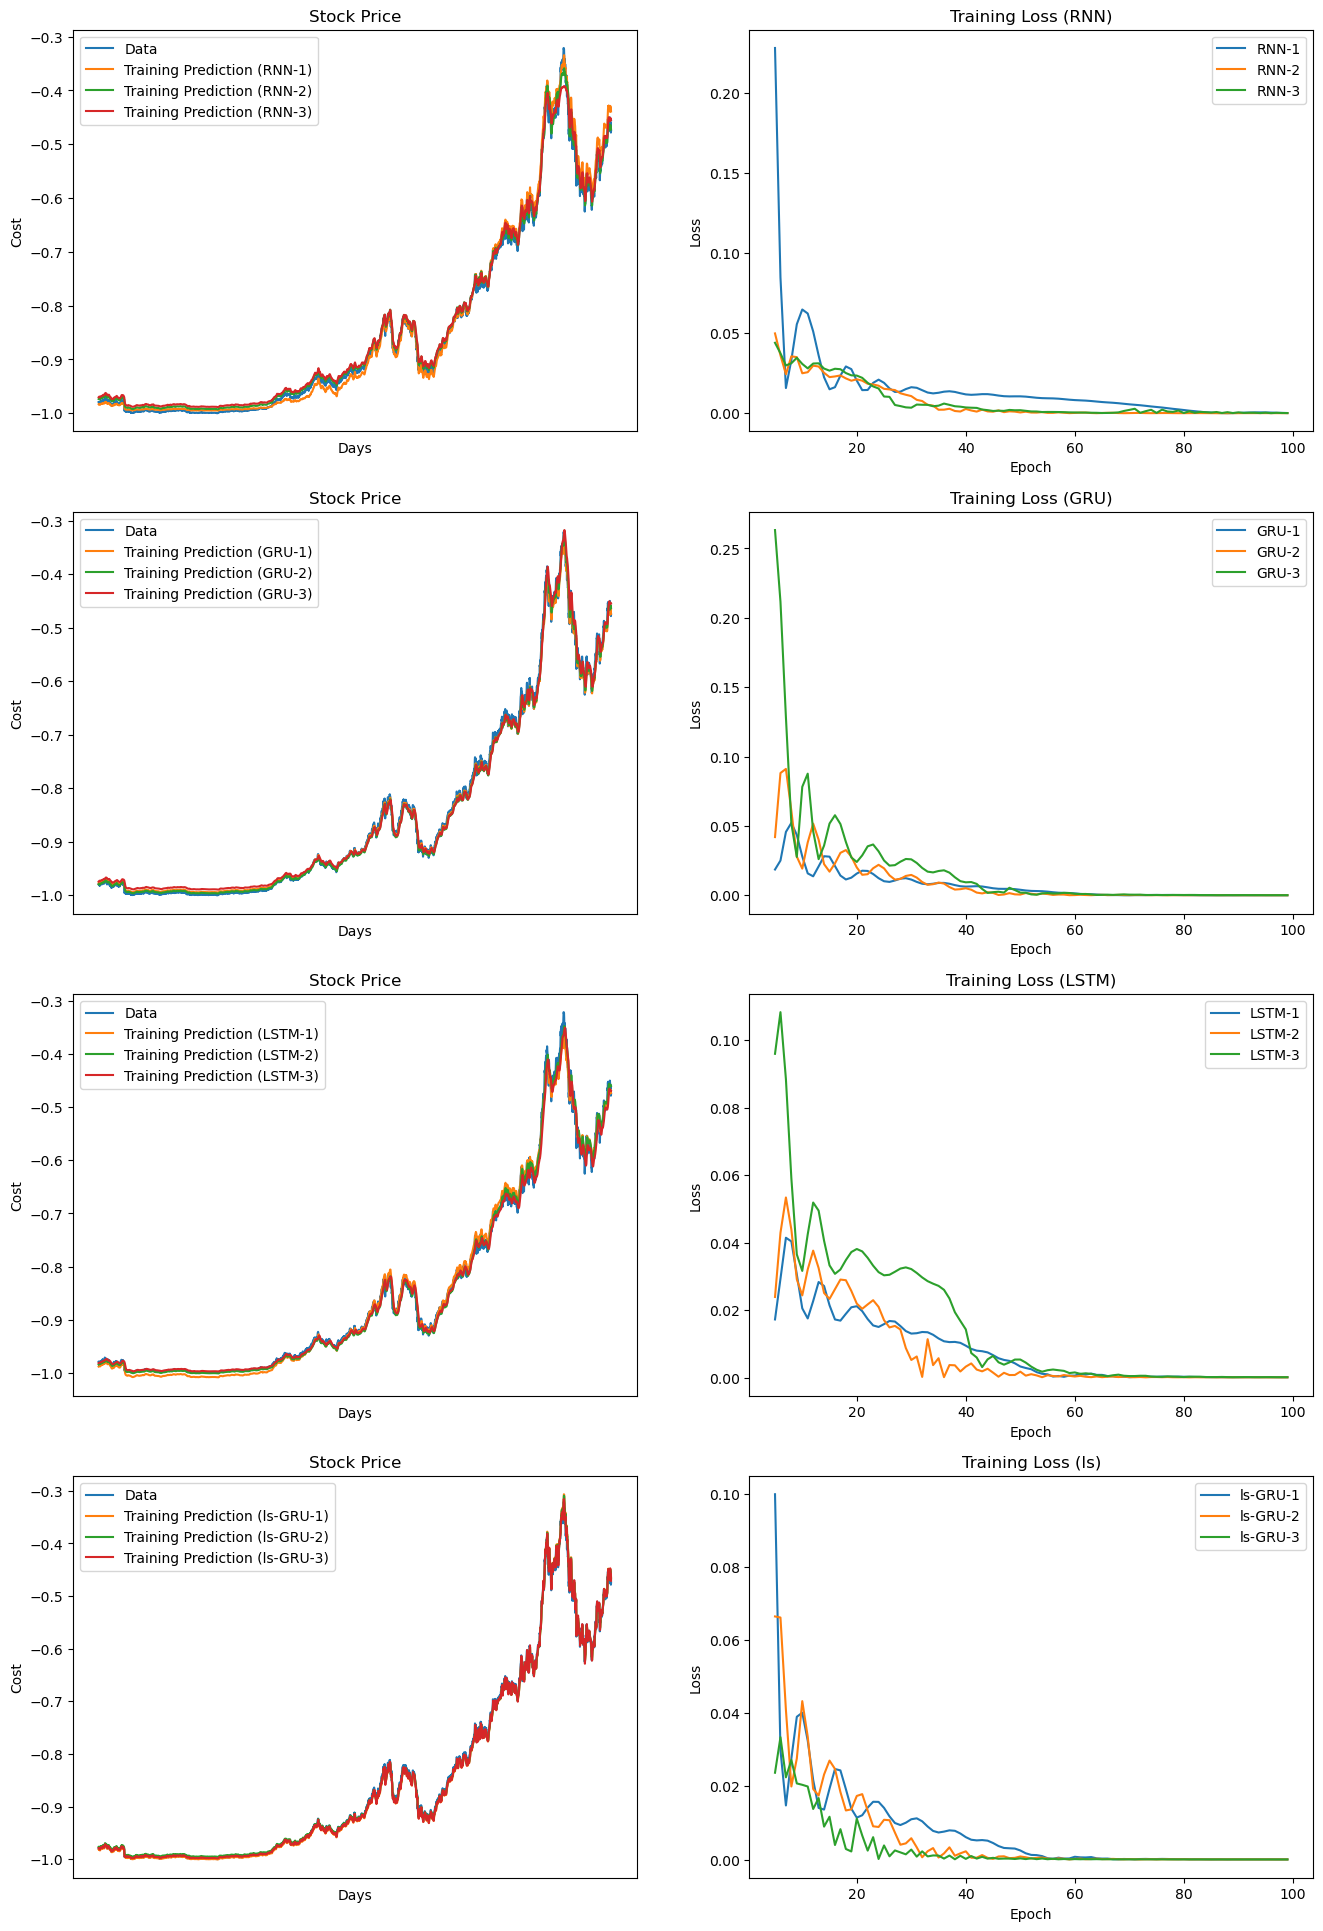

In [46]:
# display training predictions and loss
fig, ax = plt.subplots(4, 2, figsize=(16, 24))
for i in range(4):
    ax[i][0].plot(range(train_y.shape[0]), train_y, label="Data")
    for o in outs[i].keys():
        ax[i][0].plot(range(outs[i][o][0].shape[0]), outs[i][o][0].detach(), label="Training Prediction ({})".format(o))
        ax[i][1].plot(range(5, len(outs[i][o][1])), outs[i][o][1][5:], label=o) 
    ax[i][0].set_xticks([], color="white")
    ax[i][0].set_xlabel("Days")
    ax[i][0].set_ylabel("Cost")
    ax[i][0].set_title("Stock Price")
    ax[i][0].legend(loc="upper left")
    ax[i][1].set_xlabel("Epoch")
    ax[i][1].set_ylabel("Loss")
    ax[i][1].set_title("Training Loss ({})".format(o.split("-")[0]))
    ax[i][1].legend(loc="upper right")
plt.show()

In [47]:
models = [{"RNN-1": rnn1, "RNN-2": rnn2, "RNN-3": rnn3},
          {"GRU-1": gru1, "GRU-2": gru2, "GRU-3": gru3},
          {"LSTM-1": lstm1, "LSTM-2": lstm2, "LSTM-3": lstm3},
          {"ls-GRU-1": stacked1, "ls-GRU-2": stacked2, "ls-GRU-3": stacked3}]

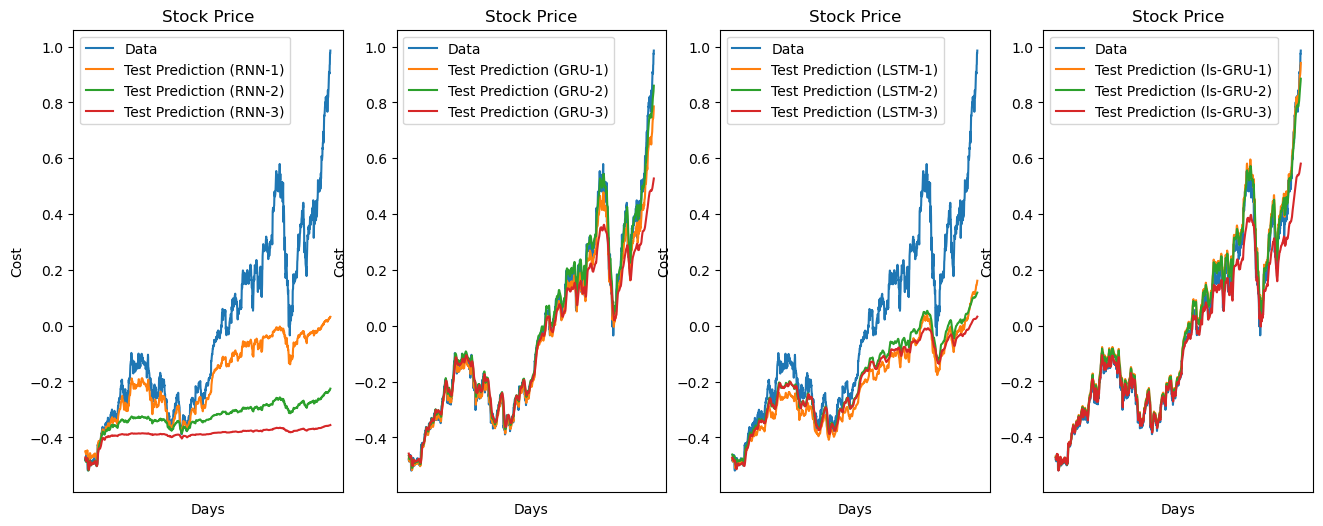

In [48]:
# display test predictions
fig, ax = plt.subplots(1, 4, figsize=(16, 6))
for i in range(4):
    ax[i].plot(range(test_y.shape[0]), test_y, label="Data")
    for o in models[i].keys():
        models[i][o].eval()
        out = models[i][o](test_x)
        ax[i].plot(range(out.shape[0]), out.detach(), label="Test Prediction ({})".format(o))
    ax[i].set_xticks([], color="white")
    ax[i].set_xlabel("Days")
    ax[i].set_ylabel("Cost")
    ax[i].set_title("Stock Price")
    ax[i].legend(loc="upper left")
plt.show()

In [49]:
data = pull_data("WFC")
X, y = testing(data)

metrics = {"RMSE": mean_squared_error, "R-Squared": r2_score, "OR": optimism_ratio, "PR": pessimism_ratio}
models = {"Martingale": martingale,
        "1-Layer RNN": rnn1, "1-Layer GRU": gru1, "1-Layer LSTM": lstm1, "1-Layer ls-GRU": stacked1,
        "2-Layer RNN": rnn2, "2-Layer GRU": gru2, "2-Layer LSTM": lstm2, "2-Layer ls-GRU": stacked2,
        "3-Layer RNN": rnn3, "3-Layer GRU": gru3, "3-Layer LSTM": lstm3, "3-Layer ls-GRU": stacked3}
tab = tabulate(X, y, models, metrics)
tab.columns = tab.columns.str.split(" ", expand=True)
print("Results:")
tab

[*********************100%***********************]  1 of 1 completed
Results:


Martingale   1-Layer                                 2-Layer  \
                 NaN       RNN       GRU      LSTM    ls-GRU       RNN   
RMSE        0.022662  0.308436  0.054260  0.290203  0.036576  0.458919   
R-Squared   0.996962  0.437290  0.982585  0.501851  0.992087 -0.245740   
OR          0.530397  0.233805  0.285430  0.116604  0.858282  0.146701   
PR          0.538968  0.828981  0.831772  0.939406  0.204106  0.920072   

                                          3-Layer                      \
                GRU      LSTM    ls-GRU       RNN       GRU      LSTM   
RMSE       0.034539  0.278112  0.034525  0.524168  0.109712  0.311712   
R-Squared  0.992944  0.542494  0.992949 -0.625161  0.928803  0.425270   
OR         0.625274  0.195934  0.778952  0.105043  0.450070  0.148894   
PR         0.420171  0.874626  0.284632  0.950568  0.642615  0.901136   

                     
             ls-GRU  
RMSE       0.088282  
R-Squared  0.953900  
OR         0.449073  
PR         0.709587

In [50]:
data = pull_data("TSLA")
X, y = testing(data)

metrics = {"RMSE": mean_squared_error, "R-Squared": r2_score, "OR": optimism_ratio, "PR": pessimism_ratio}
models = {"Martingale": martingale,
        "1-Layer RNN": rnn1, "1-Layer GRU": gru1, "1-Layer LSTM": lstm1, "1-Layer ls-GRU": stacked1,
        "2-Layer RNN": rnn2, "2-Layer GRU": gru2, "2-Layer LSTM": lstm2, "2-Layer ls-GRU": stacked2,
        "3-Layer RNN": rnn3, "3-Layer GRU": gru3, "3-Layer LSTM": lstm3, "3-Layer ls-GRU": stacked3}
tab = tabulate(X, y, models, metrics)
tab.columns = tab.columns.str.split(" ", expand=True)
print("Results:")
tab

[*********************100%***********************]  1 of 1 completed
Results:


Martingale   1-Layer                                 2-Layer  \
                 NaN       RNN       GRU      LSTM    ls-GRU       RNN   
RMSE        0.030263  0.269407  0.054342  0.265075  0.046063  0.426173   
R-Squared   0.996967  0.759626  0.990220  0.767295  0.992973  0.398492   
OR          0.621849  0.203782  0.448739  0.304622  0.839076  0.297479   
PR          0.643277  0.977311  0.837395  0.984034  0.437395  0.987815   

                                          3-Layer                      \
                GRU      LSTM    ls-GRU       RNN       GRU      LSTM   
RMSE       0.047928  0.247635  0.047859  0.490949  0.100492  0.277458   
R-Squared  0.992392  0.796907  0.992414  0.201745  0.966555  0.745044   
OR         0.683613  0.285294  0.783613  0.149580  0.480672  0.276891   
PR         0.583193  0.978571  0.490336  0.993277  0.785714  0.968908   

                     
             ls-GRU  
RMSE       0.082154  
R-Squared  0.977648  
OR         0.474790  
PR         0.829832

In [51]:
data = pull_data("GIS")
X, y = testing(data)

metrics = {"RMSE": mean_squared_error, "R-Squared": r2_score, "OR": optimism_ratio, "PR": pessimism_ratio}
models = {"Martingale": martingale,
        "1-Layer RNN": rnn1, "1-Layer GRU": gru1, "1-Layer LSTM": lstm1, "1-Layer ls-GRU": stacked1,
        "2-Layer RNN": rnn2, "2-Layer GRU": gru2, "2-Layer LSTM": lstm2, "2-Layer ls-GRU": stacked2,
        "3-Layer RNN": rnn3, "3-Layer GRU": gru3, "3-Layer LSTM": lstm3, "3-Layer ls-GRU": stacked3}
tab = tabulate(X, y, models, metrics)
tab.columns = tab.columns.str.split(" ", expand=True)
print("Results:")
tab

[*********************100%***********************]  1 of 1 completed
Results:


Martingale   1-Layer                                 2-Layer  \
                 NaN       RNN       GRU      LSTM    ls-GRU       RNN   
RMSE        0.015426  0.249237  0.041955  0.240870  0.030725  0.385805   
R-Squared   0.998965  0.729766  0.992343  0.747604  0.995893  0.352483   
OR          0.643014  0.420371  0.411800  0.406618  0.854295  0.326091   
PR          0.682081  0.834363  0.890572  0.786924  0.452860  0.955152   

                                          3-Layer                      \
                GRU      LSTM    ls-GRU       RNN       GRU      LSTM   
RMSE       0.026548  0.226902  0.028807  0.442609  0.084528  0.253937   
R-Squared  0.996934  0.776029  0.996390  0.147773  0.968918  0.719479   
OR         0.662747  0.379310  0.792705  0.205302  0.450070  0.295196   
PR         0.563484  0.844728  0.498505  0.971098  0.774965  0.887383   

                     
             ls-GRU  
RMSE       0.069414  
R-Squared  0.979039  
OR         0.533187  
PR         0.836755

In [52]:
data = pull_data("AMT")
X, y = testing(data)

metrics = {"RMSE": mean_squared_error, "R-Squared": r2_score, "OR": optimism_ratio, "PR": pessimism_ratio}
models = {"Martingale": martingale,
        "1-Layer RNN": rnn1, "1-Layer GRU": gru1, "1-Layer LSTM": lstm1, "1-Layer ls-GRU": stacked1,
        "2-Layer RNN": rnn2, "2-Layer GRU": gru2, "2-Layer LSTM": lstm2, "2-Layer ls-GRU": stacked2,
        "3-Layer RNN": rnn3, "3-Layer GRU": gru3, "3-Layer LSTM": lstm3, "3-Layer ls-GRU": stacked3}
tab = tabulate(X, y, models, metrics)
tab.columns = tab.columns.str.split(" ", expand=True)
print("Results:")
tab

[*********************100%***********************]  1 of 1 completed
Results:


Martingale   1-Layer                                 2-Layer  \
                 NaN       RNN       GRU      LSTM    ls-GRU       RNN   
RMSE        0.009233  0.174603  0.031292  0.167032  0.019953  0.262885   
R-Squared   0.999528  0.831359  0.994583  0.845666  0.997798  0.617709   
OR          0.795894  0.590193  0.600558  0.599163  0.907913  0.537373   
PR          0.820809  0.837752  0.934822  0.774566  0.625673  0.958940   

                                          3-Layer                      \
                GRU      LSTM    ls-GRU       RNN       GRU      LSTM   
RMSE       0.018811  0.159450  0.018624  0.301969  0.065655  0.177366   
R-Squared  0.998043  0.859360  0.998081  0.495589  0.976155  0.825980   
OR         0.798286  0.609129  0.860474  0.272872  0.667132  0.497508   
PR         0.702212  0.860474  0.672314  0.984453  0.789914  0.923460   

                     
             ls-GRU  
RMSE       0.054203  
R-Squared  0.983748  
OR         0.754634  
PR         0.856089